# Claim reimbursement regression for Healthcare Fraud Detection

Deborah Leong, Sam Nuzbrokh and Doug Devens

This file attempts to generate a regression model to predict the amount of reimbursement expected for a claim with certain characteristics.  We will take the mean residual or difference by provider from that provider's claims and see if that helps in fraud detection.

We import modules to read in data and then read in the combinedData file that includes all the claims in the training and submission sets.

In [1]:
import pandas as pd
claim_data = pd.read_csv('combinedData.csv')
claim_data.sample(10)

/Users/doug/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10,13,14,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,...,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,NumChronics,NumProc,NumDiag,AdmissionDays,ClaimDays,Age
422941,422941,BENE100772,CLM454111,2009-07-05,2009-07-05,PRV54332,20,PHY424939,NaN,PHY422235,...,0,420,160,0,2,0,2,NaN,1,70.0
589094,589094,BENE25170,CLM708828,2009-12-01,2009-12-01,PRV57591,10,PHY366391,NaN,NaN,...,0,2140,570,0,7,0,2,NaN,1,75.0
11951,11951,BENE21606,CLM324656,2009-04-26,2009-04-26,PRV52628,600,PHY432650,PHY432650,PHY322092,...,1068,2700,1020,0,3,0,1,NaN,1,88.0
619726,619726,BENE64129,CLM606076,2009-09-30,2009-09-30,PRV52329,600,PHY360260,NaN,PHY360260,...,0,4710,560,0,6,0,2,NaN,1,90.0
26199,26199,BENE33932,CLM59133,2009-07-10,2009-07-16,PRV53781,7000,PHY403054,NaN,NaN,...,2136,890,180,0,6,0,11,7.0,7,100.0
617004,617004,BENE60761,CLM133857,2009-01-12,2009-01-12,PRV52595,10,PHY367349,NaN,NaN,...,1068,900,470,0,4,0,1,NaN,1,73.0
231422,231422,BENE28211,CLM562018,2009-09-04,2009-09-04,PRV56448,20,PHY360179,NaN,NaN,...,1068,250,80,0,5,0,4,NaN,1,49.0
448776,448776,BENE110532,CLM599551,2009-09-26,2009-09-26,PRV54748,100,PHY420515,NaN,NaN,...,0,1720,600,0,6,0,2,NaN,1,77.0
402161,402161,BENE92931,CLM629931,2009-10-14,2009-10-14,PRV53958,300,PHY394276,PHY394276,NaN,...,0,800,190,0,7,0,2,NaN,1,72.0
550822,550822,BENE148809,CLM515086,2009-08-08,2009-08-08,PRV53634,30,PHY403755,PHY403755,NaN,...,0,100,1100,0,1,0,1,NaN,1,71.0


In [2]:
claim_data.columns

Index(['Unnamed: 0', 'BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt',
       'Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'AdmissionDt',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'Set', 'Status', 'DOB',
       'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'Alzheimer',
       'HeartFailure', 'KidneyDisease', 'Cancer', 'ObstrPulmonary',
       'Depression', 'Diabetes', 'IschemicHeart', 'Osteoporasis',
       'Rheuma

We import numpy to be able to confirm which columns are identified as string or continuous variables.

In [3]:
import numpy as np

In [4]:
claim_data_str = claim_data.select_dtypes(exclude='number').columns
claim_data_str

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DischargeDt',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'Set', 'Status', 'DOB',
       'DOD', 'State'],
      dtype='object')

We confine the dataset to the training data, removing the submission set claims.

In [5]:
claim_data = claim_data[claim_data['Set']=='Train']
# claim_data[claim_data['InscClaimAmtReimbursed']<=0]['InscClaimAmtReimbursed'].value_counts()
claim_data.shape


(558211, 64)

We group the claims by provider to get a rough estimate of the distribution of the number of claims for each provider.

In [6]:
claim_data.groupby('Provider').count()


,Unnamed: 0,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,NumChronics,NumProc,NumDiag,AdmissionDays,ClaimDays,Age
Provider,,,,,,,,,,,,,,,,,,,,,
PRV51001,25,25,25,25,25,25,25,5,10,5,...,25,25,25,25,25,25,25,5,25,25
PRV51003,132,132,132,132,132,132,132,45,25,62,...,132,132,132,132,132,132,132,62,132,132
PRV51004,149,149,149,149,149,149,149,27,63,0,...,149,149,149,149,149,149,149,0,149,149
PRV51005,1165,1165,1165,1165,1165,1165,1163,222,478,0,...,1165,1165,1165,1165,1165,1165,1165,0,1165,1165
PRV51007,72,72,72,72,72,72,72,12,26,3,...,72,72,72,72,72,72,72,3,72,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PRV57759,28,28,28,28,28,28,28,1,12,0,...,28,28,28,28,28,28,28,0,28,28
PRV57760,22,22,22,22,22,22,22,6,9,0,...,22,22,22,22,22,22,22,0,22,22
PRV57761,82,82,82,82,82,82,82,14,36,0,...,82,82,82,82,82,82,82,0,82,82


We remove records with 0 or negative reimbursements, and drop spurious columns (Unnamed: 0) and the set identifier since we're keeping only the training dataset.

In [7]:
claim_data = claim_data[claim_data['InscClaimAmtReimbursed']>0]
claim_data = claim_data.drop(columns=['Set','Unnamed: 0'])

In [8]:
claim_data = claim_data.fillna(0)
c=np.sum(claim_data.isnull())
c[c>0]

Series([], dtype: int64)

We take the logarithm of the features where there is more spread due to large numbers, such as reimbursement.  We also dummify the claim status, with outpatient as 0 and inpatient as 1.


In [9]:
claim_data['logReimbursedAmount'] =np.log(claim_data['InscClaimAmtReimbursed'])
claim_data['logOPAnnualReimbursement'] = np.log(claim_data['OPAnnualReimbursementAmt']+0.1)
claim_data['logIPAnnualReimbursement'] = np.log(claim_data['IPAnnualReimbursementAmt']+0.1)
claim_data['logOPAnnualDeductibleAmt'] = np.log(claim_data['OPAnnualDeductibleAmt']+0.1)
claim_data['logIPAnnualDeductibleAmt'] = np.log(claim_data['IPAnnualDeductibleAmt']+0.1)
claim_data['logClaimDays'] = np.log(claim_data['ClaimDays']+0.1)
claim_data['Status_dum'] = [0 if x=='out' else 1 for x in claim_data['Status']]


/Users/doug/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
a = claim_data[['OPAnnualReimbursementAmt','logOPAnnualReimbursement','IPAnnualReimbursementAmt','logIPAnnualReimbursement']]
a.describe()

,OPAnnualReimbursementAmt,logOPAnnualReimbursement,IPAnnualReimbursementAmt,logIPAnnualReimbursement
count,537558.000000,537544.000000,537558.000000,537504.000000
mean,2297.841424,6.902330,5267.715707,1.579455
std,3910.603624,1.530830,11835.463500,5.487771
min,-70.000000,-2.302585,-1400.000000,-2.302585
25%,470.000000,6.152945,0.000000,-2.302585
50%,1180.000000,7.073354,0.000000,-2.302585
75%,2610.000000,7.867144,6000.000000,8.699531
max,102960.000000,11.542097,161470.000000,11.992075


In [11]:
claim_data[['logOPAnnualReimbursement','logIPAnnualReimbursement']].describe()

,logOPAnnualReimbursement,logIPAnnualReimbursement
count,537544.000000,537504.000000
mean,6.902330,1.579455
std,1.530830,5.487771
min,-2.302585,-2.302585
25%,6.152945,-2.302585
50%,7.073354,-2.302585
75%,7.867144,8.699531
max,11.542097,11.992075


In [12]:
claim_data.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Status', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'Alzheimer', 'HeartFailure', 'KidneyDisease',
       'Cancer', 'ObstrPulmonary', 'Depression', 'Diabetes', 'IschemicHeart',
       'Osteoporasis', 'RheumatoidArthritis', 'Stroke',
  

We keep the features that are continuous numbers.

In [13]:
columns_to_keep = ['Status_dum', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov','logIPAnnualReimbursement', 'logIPAnnualDeductibleAmt',
       'logOPAnnualReimbursement', 'logOPAnnualDeductibleAmt', 'WhetherDead',
       'NumChronics', 'NumProc', 'NumDiag','logClaimDays','Age']
claim_data_reduce = claim_data[columns_to_keep]
claim_data_str = claim_data_reduce.select_dtypes(exclude='number').columns
claim_data_str

Index([], dtype='object')

In [14]:
claim_data = claim_data.fillna(0)
c=np.sum(claim_data.isnull())
c[c>0]

Series([], dtype: int64)

In [15]:
claim_data.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Status', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'Alzheimer', 'HeartFailure', 'KidneyDisease',
       'Cancer', 'ObstrPulmonary', 'Depression', 'Diabetes', 'IschemicHeart',
       'Osteoporasis', 'RheumatoidArthritis', 'Stroke',
  

We import graphics modules, and begin to visualize the relationship between various features and the reimbursement.

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
# plt.scatter(claim_data_reduce['Status_dum'],claim_data_nozero['logReimbursedAmount'])

We first examine the relationship between various features and the amount reimbursed.  There appears to be no relationship between the patient's limit on annual reimbursement and the amount reimbursed on a claim.

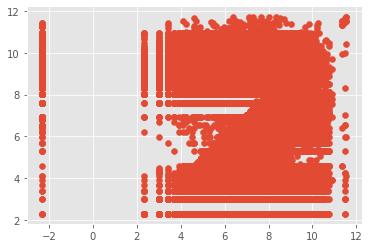

In [17]:
plt.scatter(claim_data_reduce['logOPAnnualReimbursement'],claim_data['logReimbursedAmount'])

We potentially see a relationship between the number of diagnostic codes on the claim and the log of the reimbursed amount.  This would make sense since the physician is paid for service, and each code is more service.  

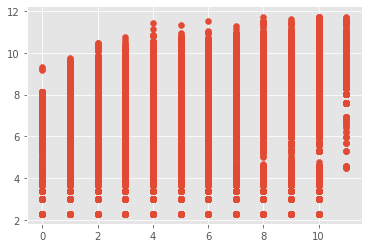

In [18]:
plt.scatter(claim_data_reduce['NumDiag'],claim_data['logReimbursedAmount'])


We plot here the log of the reimbursed amount on a claim as a function of the number of procedure codes on the claim. Again, as physicians are paid for service the relationship is unsurprising.

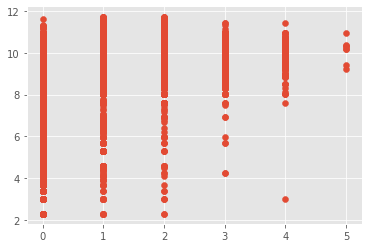

In [19]:
plt.scatter(claim_data_reduce['NumProc'],claim_data['logReimbursedAmount'])


We plot here the relationship between the age of the patient and the amount reimbursed and no relationship appears obvious.

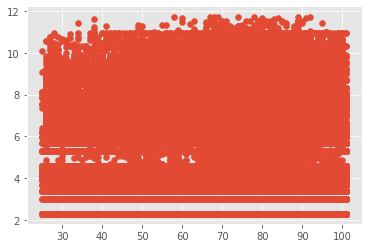

In [21]:
plt.scatter(claim_data_reduce['Age'],claim_data['logReimbursedAmount'])


We plot the log of the patient's reimbursement limit and the amount reimbursed on a given claim and find there is some relationship at higher reimbursement limits, where the insurance company won't reimburse beyond limit in the insurance policy.

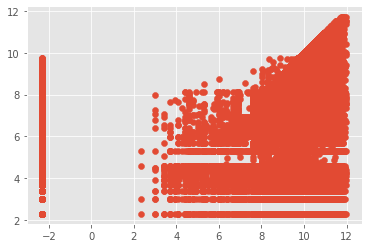

In [22]:
plt.scatter(claim_data_reduce['logIPAnnualReimbursement'],claim_data['logReimbursedAmount'])


Here we set the target (y, log of the amount reimbursed on the claim) and scale the feature matrix since we intend to use a ridge regression to reduce the effect of multicollinearity in the features.

In [23]:
y = claim_data['logReimbursedAmount']
X_scaled = (claim_data_reduce-claim_data_reduce.min(axis=0))/(claim_data_reduce.max(axis=0)-claim_data_reduce.min(axis=0))
X_scaled.head()

,Status_dum,NoOfMonths_PartACov,NoOfMonths_PartBCov,logIPAnnualReimbursement,logIPAnnualDeductibleAmt,logOPAnnualReimbursement,logOPAnnualDeductibleAmt,WhetherDead,NumChronics,NumProc,NumDiag,logClaimDays,Age
0,1.0,1.0,1.0,0.895010,0.807057,0.462170,0.553519,0.0,0.636364,0.0,0.909091,0.530023,0.539474
1,1.0,1.0,1.0,0.895010,0.807057,0.462170,0.553519,0.0,0.636364,0.2,0.363636,0.294486,0.552632
2,1.0,1.0,1.0,0.895010,0.807057,0.462170,0.553519,0.0,0.636364,0.0,0.636364,0.373952,0.552632
3,1.0,1.0,1.0,0.756912,0.721601,0.565159,0.681811,0.0,0.545455,0.2,0.909091,0.600563,0.921053
4,0.0,1.0,1.0,0.756912,0.721601,0.565159,0.681811,0.0,0.545455,0.0,0.545455,0.000000,0.921053


In [32]:
X_scaled = X_scaled.fillna(0)
c=np.sum(X_scaled.isnull())
c[c>0]

Series([], dtype: int64)

We import required model and graphics modules.

In [17]:
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
plt.style.use('ggplot')

We import the ridge, lasso and elasticnet models from sklearn, and set an instance of the Ridge model.

In [27]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
ridge = Ridge()
ridge


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [28]:
X_scaled.shape,y.shape


((537558, 13), (537558,))

We import the model selection module from sklearn, and split the data to test and train sets.

In [33]:
from sklearn import model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X_scaled, y, 
                                            test_size=0.20, random_state=32)

In [35]:
c=np.sum(X_test.isnull())
c[c>0]


Series([], dtype: int64)

We fit the ridge model to the scaled training set.  We find the model is not overfit, but also has relatively uniformly poor performance.

In [37]:
ridge.fit(X_train,y_train)
print(ridge.score(X_train,y_train))
print(ridge.score(X_test,y_test))


0.49108191650347366
0.4927160434297899


The features for the model show that the annual reimbursement (especially for out-patient) and the in-patient or out-patient status (in-patient is more expensive) are important features driving performance.

In [38]:
pd.DataFrame(list(zip(X_train.columns,abs(ridge.coef_)))).sort_values(by=[1],ascending=False)


,0,1
5,logOPAnnualReimbursement,4.274739
0,Status_dum,3.550902
9,NumProc,1.523854
11,logClaimDays,1.147123
6,logOPAnnualDeductibleAmt,0.757372
10,NumDiag,0.753106
3,logIPAnnualReimbursement,0.673370
4,logIPAnnualDeductibleAmt,0.668498
8,NumChronics,0.511482
2,NoOfMonths_PartBCov,0.148467


To determine if the model, poor as it is, follows the assumptions implicit in linear regression we look at some of the regression residuals.  We observe some outlier residuals, but the majority of the residuals are normally distributed around 0.

(array([4.00000e+00, 1.30000e+01, 4.10000e+02, 1.64920e+04, 6.63170e+04,
        1.68763e+05, 1.03750e+05, 5.94990e+04, 1.45740e+04, 2.24000e+02]),
 array([-6.83066862, -5.67146365, -4.51225867, -3.3530537 , -2.19384872,
        -1.03464375,  0.12456123,  1.2837662 ,  2.44297118,  3.60217615,
         4.76138113]),
 <a list of 10 Patch objects>)

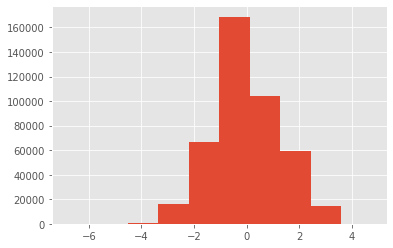

In [39]:
plt.hist(y_train-ridge.predict(X_train))


However, our assumption of constant variance with respect to fit appears invalid. The distribution of the residuals as a function of predicted value is clearly not constant.  The variance seems especially large at middle values of the reimbursement amount, and there may be some bias at larger values of predicted reimbursement.

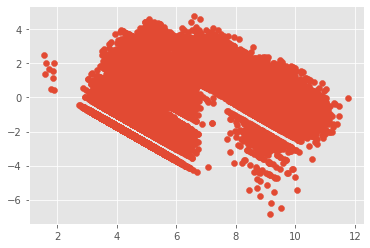

In [40]:
plt.scatter(ridge.predict(X_train),(y_train-ridge.predict(X_train)))


The same type of plot, residuals as a function of the actual value of the claim, showing clear bias at the extrema, with the model overpredicting at small reimbursed amounts, and underpredicting at higher reimbursement amounts.

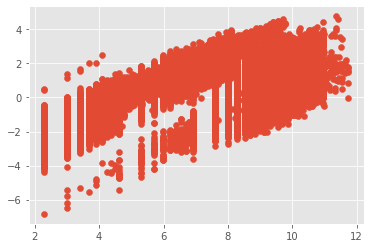

In [41]:
plt.scatter(y_train,(y_train-ridge.predict(X_train)))


We now examine if there is one particular feature that is causing the skew.  We don't really see any bias in the plot of the number of months of Part A coverage, but we do see variable variance  as a function of the number of the months of coverage, with the variability particularly high at short and long times of coverage.

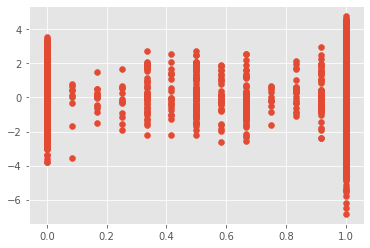

In [85]:
plt.scatter(X_train.loc[:,'NoOfMonths_PartACov'],(y_train-ridge.predict(X_train)))


We seem similar behavior for the number of months of Part B coverage.

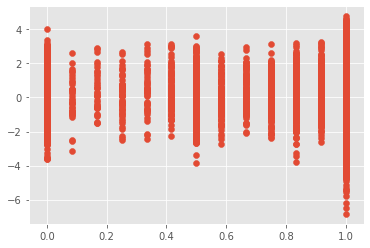

In [86]:
plt.scatter(X_train.loc[:,'NoOfMonths_PartBCov'],(y_train-ridge.predict(X_train)))


When we plot the residuals as a function of the patient's InPatient Annual Deductible amount, with no obvious bias but clear variation of the residuals with respect to the amount of the deductible, and less variation at higher deductibles.

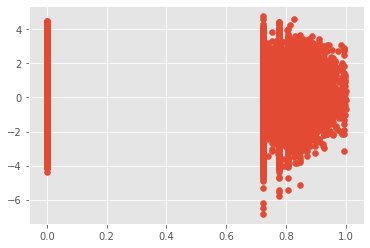

In [87]:
plt.scatter(X_train.loc[:,'logIPAnnualDeductibleAmt'],(y_train-ridge.predict(X_train)))


We see less variation of the residuals as a function of the value of the patient's In-Patient Annual Reimbursement amount.  We see some evidence of high leverage for patients with a 0 annual reimbursement limit, but it's not clear if it materially affected the model.

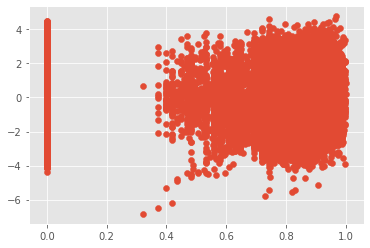

In [88]:
plt.scatter(X_train.loc[:,'logIPAnnualReimbursement'],(y_train-ridge.predict(X_train)))


We see different behavior with respect to the patient's out-patient reimbursement limit, where we seem to see a bias at middle values of the out-patient reimbursement limit, and there is some bias (and some higher leverage) for patients with 0 reimbursement limits.

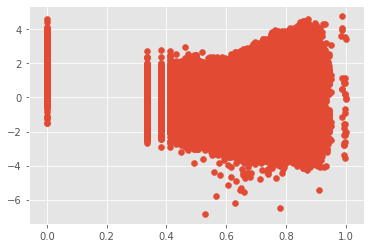

In [89]:
plt.scatter(X_train.loc[:,'logOPAnnualReimbursement'],(y_train-ridge.predict(X_train)))


The residuals don't appear to be affected greatly by the in-patient (1) or out-patient (0) status of the claim. 

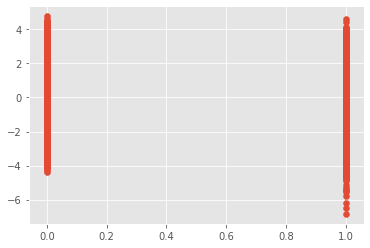

In [42]:
plt.scatter(X_train.loc[:,'Status_dum'],(y_train - ridge.predict(X_train)))


The residuals appear approximately constant as a function duration of the claim.

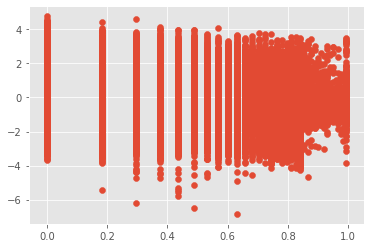

In [43]:
plt.scatter(X_train.loc[:,'logClaimDays'],(y_train - ridge.predict(X_train)))


We don't see any significant bias of the residuals with respect to the number of procedures on the claim, but clearly observe the variation of the residuals decreases with an increasing number of procedures.

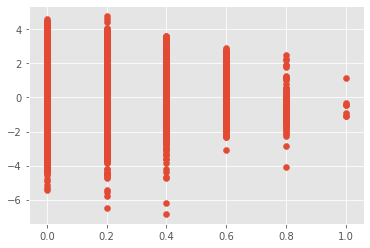

In [44]:
plt.scatter(X_train.loc[:,'NumProc'],(y_train - ridge.predict(X_train)))


Much like the patient's in-patient annual deductible limit, the residuals with respect to the out-patient annual deductible limit appear unbiased and the variance is roughly constant.

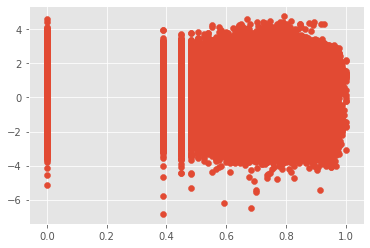

In [45]:
plt.scatter(X_train.loc[:,'logOPAnnualDeductibleAmt'],(y_train - ridge.predict(X_train)))

The residuals with respect to the number of diagnostic codes on the claim appear unbiased, and rougly constant across the range.

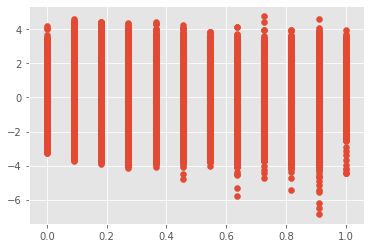

In [95]:
plt.scatter(X_train.loc[:,'NumDiag'],(y_train - ridge.predict(X_train)))


The model residuals as a function of the patient's number of chronic illnesses appear unbiased but the variance may decrease with an increasing number of chronic illnesses.

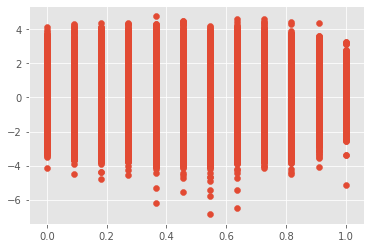

In [96]:
plt.scatter(X_train.loc[:,'NumChronics'],(y_train - ridge.predict(X_train)))


We now read in the entire data file since we had to remove records with negative and zero reimbursement values.

In [46]:
claim_data_full = pd.read_csv('combinedData.csv')
claim_data_full = claim_data_full[claim_data_full['Set']=='Train']
claim_data_full = claim_data_full.drop(columns=['Set','Unnamed: 0'])
claim_data_full.shape

/Users/doug/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10,13,14,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(558211, 62)

We now recreate the same features in order to be able to use the model to calculate residuals between the predicted claim reimbursement amounts and the actual reimbursement amount.

In [47]:
claim_data_full = claim_data_full.fillna(0)
import numpy as np
claim_data_full['logReimbursedAmount'] =np.log(claim_data_full['InscClaimAmtReimbursed'])
claim_data_full['logOPAnnualReimbursement'] = np.log(claim_data_full['OPAnnualReimbursementAmt']+0.1)
claim_data_full['logIPAnnualReimbursement'] = np.log(claim_data_full['IPAnnualReimbursementAmt']+0.1)
claim_data_full['logOPAnnualDeductibleAmt'] = np.log(claim_data_full['OPAnnualDeductibleAmt']+0.1)
claim_data_full['logIPAnnualDeductibleAmt'] = np.log(claim_data_full['IPAnnualDeductibleAmt']+0.1)
claim_data_full['logClaimDays'] = np.log(claim_data_full['ClaimDays']+0.1)
claim_data_full['Status_dum'] = [0 if x=='out' else 1 for x in claim_data_full['Status']]
columns_to_keep = ['Provider','Status_dum', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov','logIPAnnualReimbursement', 'logIPAnnualDeductibleAmt',
       'logOPAnnualReimbursement', 'logOPAnnualDeductibleAmt', 'WhetherDead',
       'NumChronics', 'NumProc', 'NumDiag','logClaimDays','Age']
claim_data_full_reduce = claim_data_full[columns_to_keep]

/Users/doug/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/doug/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [48]:
claim_data_full_reduce.shape

(558211, 14)

We scale the feature matrix in order to be able to use the model we generated.

In [49]:
claim_data_full_reduce.iloc[:,1:]
X_scaled_full = (claim_data_full_reduce.iloc[:,1:]-claim_data_full_reduce.iloc[:,1:].min(axis=0))/(claim_data_full_reduce.iloc[:,1:].max(axis=0)-claim_data_full_reduce.iloc[:,1:].min(axis=0))
X_scaled_full.shape

(558211, 13)

We now concatenate the columns to be able to calculate the average residuals by provider.

In [113]:
claim_data_full_reduce = claim_data_full_reduce.fillna(0)
X_scaled_full = X_scaled_full.fillna(0)
provid_resid = pd.concat([claim_data_full_reduce['Provider'],(np.log(claim_data_full['InscClaimAmtReimbursed']+0.1)\
            -ridge.predict(X_scaled_full))],axis=1)
provid_resid.shape

(558211, 2)

In [44]:
X_scaled_full.columns

Index(['Status_dum', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'logIPAnnualReimbursement', 'logIPAnnualDeductibleAmt',
       'logOPAnnualReimbursement', 'logOPAnnualDeductibleAmt', 'WhetherDead',
       'NumChronics', 'NumProc', 'NumDiag', 'logClaimDays', 'Age'],
      dtype='object')

In [66]:
claim_data_full.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Status', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'Alzheimer', 'HeartFailure', 'KidneyDisease',
       'Cancer', 'ObstrPulmonary', 'Depression', 'Diabetes', 'IschemicHeart',
       'Osteoporasis', 'RheumatoidArthritis', 'Stroke',
  

We calculate the dollars of reimbursement per day of claim duration.

In [50]:
claim_data_full['$PerClaimDay']=claim_data_full['InscClaimAmtReimbursed']/claim_data_full['ClaimDays']
claim_data_full['$PerClaimDay']

0         3714.285714
1         1666.666667
2         1250.000000
3          555.555556
4           50.000000
             ...     
577933     800.000000
577934     400.000000
577935      60.000000
577936      70.000000
577937      40.000000
Name: $PerClaimDay, Length: 558211, dtype: float64

We create a dataframe with the sums and means of several quantities by provider that we will use in the models for fraud prediction.

In [110]:
AnnReimburse = claim_data_full.groupby('Provider').agg({'logOPAnnualReimbursement':'mean',\
                'logIPAnnualReimbursement':'mean','$PerClaimDay':'mean','InscClaimAmtReimbursed':'sum'})
AnnReimburse = AnnReimburse.reset_index()
AnnReimburse

,Provider,logOPAnnualReimbursement,logIPAnnualReimbursement,$PerClaimDay,InscClaimAmtReimbursed
0,PRV51001,6.894855,2.970165,985.600000,104640
1,PRV51003,6.519020,4.485369,1181.826449,605670
2,PRV51004,6.895270,0.748651,248.629269,52170
3,PRV51005,6.971830,0.754432,193.738586,280910
4,PRV51007,6.869414,1.024623,235.555556,33710
...,...,...,...,...,...
5405,PRV57759,7.309457,0.616799,195.986395,10640
5406,PRV57760,6.942612,2.244123,216.022727,4770
5407,PRV57761,7.138863,1.623980,153.191585,18470
5408,PRV57762,7.839959,9.615812,1900.000000,1900


We create the dataframe with the mean claim reimbursement residual by provider.

In [121]:
provider_groups = provid_resid.groupby('Provider').mean()
provider_groups = provider_groups.reset_index()
provider_groups.columns=['Provider','MeanResidualReimbursement']
provider_groups

,Provider,MeanResidualReimbursement
0,PRV51001,0.648988
1,PRV51003,-0.233742
2,PRV51004,-0.221281
3,PRV51005,-0.299886
4,PRV51007,-0.192456
...,...,...
5405,PRV57759,-0.246039
5406,PRV57760,0.196036
5407,PRV57761,-0.878348
5408,PRV57762,2.816773


We merge the dataframes for ease of handling.

In [122]:
provider_groups = pd.merge(provider_groups,AnnReimburse,on='Provider')
provider_groups

,Provider,MeanResidualReimbursement,logOPAnnualReimbursement,logIPAnnualReimbursement,$PerClaimDay,InscClaimAmtReimbursed
0,PRV51001,0.648988,6.894855,2.970165,985.600000,104640
1,PRV51003,-0.233742,6.519020,4.485369,1181.826449,605670
2,PRV51004,-0.221281,6.895270,0.748651,248.629269,52170
3,PRV51005,-0.299886,6.971830,0.754432,193.738586,280910
4,PRV51007,-0.192456,6.869414,1.024623,235.555556,33710
...,...,...,...,...,...,...
5405,PRV57759,-0.246039,7.309457,0.616799,195.986395,10640
5406,PRV57760,0.196036,6.942612,2.244123,216.022727,4770
5407,PRV57761,-0.878348,7.138863,1.623980,153.191585,18470
5408,PRV57762,2.816773,7.839959,9.615812,1900.000000,1900


We write the dataframe to a csv file in order to read it into the notebooks for the models.

In [123]:
provider_groups.to_csv('provider_groups_residual.csv')